# MNIST image classification with Keras

In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)


Init Plugin
Init Graph Optimizer
Init Kernel
TensorFlow version: 2.5.0


# Load data

In [2]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = keras.datasets.mnist.load_data()

In [3]:
type(x_train_raw[0,0,0])

numpy.uint8

## Preprocess data 

In [4]:
x_train_raw,  x_test_raw = x_train_raw.astype(np.float32)/255.0 , x_test_raw.astype(np.float32)/255.0

# Build Network 

In [5]:
n_labels   = 10
n_features = int(28*28)

#define architecture
model = keras.models.Sequential([
                                    keras.layers.Flatten( input_shape = x_train_raw[0,].shape),
                                    keras.layers.Dense(30, activation = 'relu'),
                                    keras.layers.Dropout(0.3), 
                                    keras.layers.Dense( n_labels)
                                 ]
                                )
#define loss function
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# loss_fn = keras.losses.MeanSquaredError() 

#define optimizer and compile
model.compile(optimizer='sgd', 
              loss= loss_fn,
              metrics=['accuracy']
             )


Metal device set to: Apple M1


2021-10-03 16:43:42.623031: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-10-03 16:43:42.623279: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
#fit model 
model.fit(x_train_raw, y_train_raw, epochs = 5)

Epoch 1/5
  13/1875 [..............................] - ETA: 8s - loss: 2.3250 - accuracy: 0.1587  

2021-10-03 16:43:45.782116: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-03 16:43:45.782277: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-10-03 16:43:45.861245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 7s 3ms/step - loss: 0.9522 - accuracy: 0.7162
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5563 - accuracy: 0.8353
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4794 - accuracy: 0.8576
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4389 - accuracy: 0.8696
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4063 - accuracy: 0.8785


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [11]:
test_loss, test_acc = model.evaluate(x_test_raw,  y_test_raw, verbose=1)

print('\nTest accuracy:', test_acc)


313/313 [==============================] - 1s 3ms/step - loss: 0.2591 - accuracy: 0.9261

Test accuracy: 0.9261000156402588


# Inference

In [12]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test_raw)

2021-10-03 16:45:51.969777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [13]:
predictions.shape

(10000, 10)

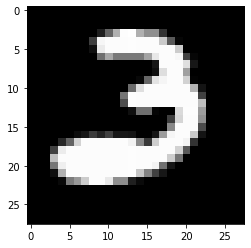

Model prediction: 2; ground truth: 3


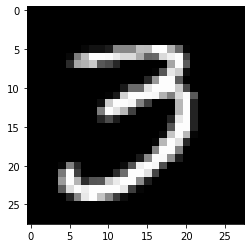

Model prediction: 3; ground truth: 3


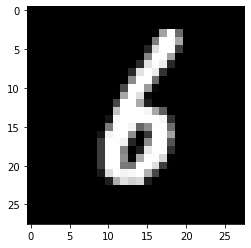

Model prediction: 6; ground truth: 6


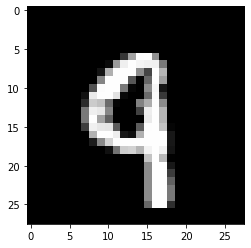

Model prediction: 9; ground truth: 9


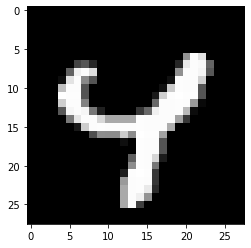

Model prediction: 4; ground truth: 4


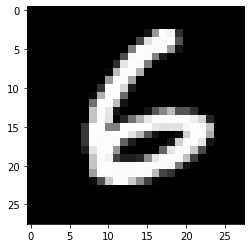

Model prediction: 6; ground truth: 6


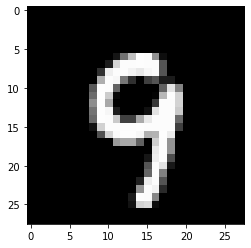

Model prediction: 9; ground truth: 9


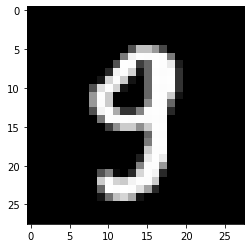

Model prediction: 9; ground truth: 9


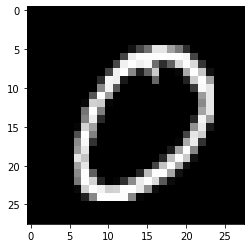

Model prediction: 0; ground truth: 0


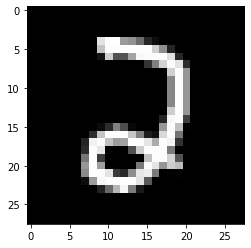

Model prediction: 2; ground truth: 2


In [15]:
# Predict n_images images from validation set.
n_images = 10
n_images_idx = np.random.choice( 10000, n_images)
test_images = x_test_raw[n_images_idx,:,:]
test_labels = y_test_raw[n_images_idx]

# # Display image and model prediction.
for i, idx in enumerate(n_images_idx):
    prediction = np.argmax(predictions[idx,:])
    label = test_labels[i]
    plt.imshow(test_images[i,], cmap='gray')
    plt.show()
    print(f"Model prediction: {prediction}; ground truth: {label}" )